<a href="https://colab.research.google.com/github/meliksahb/Design-of-Intelligent-Machines-ME536-/blob/main/Shapes_e2738425.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Meliksah Besir e2738425

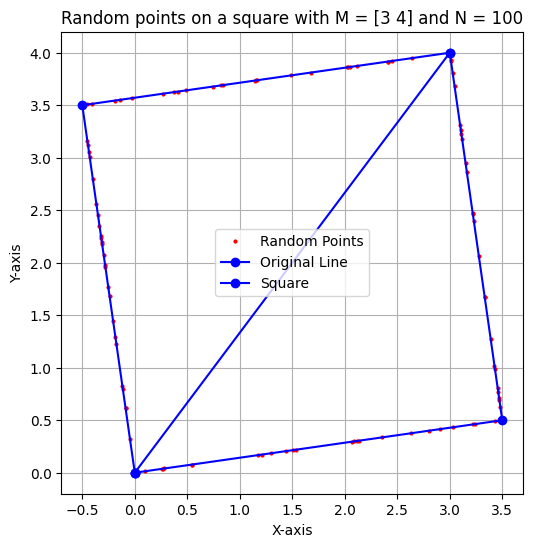

In [43]:
def Square_e2738425(M = np.array([3,4]), N = 100):
  '''
  Generate N many random points on a square where
  Each side should have N/4 randomly located points
  One corner of the square is at the origin, i.e. (0,0)
  where as the opposite corner from the origin is at M = [x,y]
  return D as a numpy array where D is 2xN
  '''
  # I use ChatGPT for def generate_random_points_along_line because I tried to generate points randomly but
  # didn't succeed. My prompt is: Can you generate random point in lines using randn for given code. Then I correct some mistakes
  x1, y1 = M
  midpoint_x = x1 / 2
  midpoint_y = y1 / 2
  length = np.sqrt(x1**2 + y1**2)

  # Perpendicular to the line is -dy, dx
  dx = -y1
  dy = x1

  # Normalize to get unit vector
  norm = np.sqrt(dx**2 + dy**2)
  dx /= norm
  dy /= norm

  # Distance from the midpoint is length / 2
  dist = length / 2

  # Calculate the two perpendicular points
  perp_point1_x = midpoint_x + dx * dist
  perp_point1_y = midpoint_y + dy * dist
  perp_point2_x = midpoint_x - dx * dist
  perp_point2_y = midpoint_y - dy * dist

  # Define the square's corners
  square_points = np.array([[0, perp_point1_x, x1, perp_point2_x, 0],
                            [0, perp_point1_y, y1, perp_point2_y, 0]])

  # Generate N/4 random points on each side of the square using np.random.randn
  points_per_side = N // 4

  def generate_random_points_along_line(x_start, x_end, y_start, y_end, num_points):
      t = np.random.rand(num_points)  # Generate random scaling factors between 0 and 1
      x_points = (1 - t) * x_start + t * x_end  # Linearly interpolate between start and end points for x
      y_points = (1 - t) * y_start + t * y_end  # Linearly interpolate for y
      return np.array([x_points, y_points])

  # Generate random points along each side of the square
  side1 = generate_random_points_along_line(square_points[0][0], square_points[0][1],
                                            square_points[1][0], square_points[1][1], points_per_side)

  side2 = generate_random_points_along_line(square_points[0][1], square_points[0][2],
                                            square_points[1][1], square_points[1][2], points_per_side)

  side3 = generate_random_points_along_line(square_points[0][2], square_points[0][3],
                                            square_points[1][2], square_points[1][3], points_per_side)

  side4 = generate_random_points_along_line(square_points[0][3], square_points[0][4],
                                            square_points[1][3], square_points[1][4], points_per_side)

  # Concatenate all points to form the complete set of points
  D = np.hstack((side1, side2, side3, side4))

  # Plot the square and the random points
  plt.figure(figsize=(6, 6))
  plt.plot(D[0, :], D[1, :], 'ro', markersize=2, label="Random Points")
  plt.plot([0, x1], [0, y1], 'bo-', label="Original Line")
  plt.plot(square_points[0], square_points[1], 'bo-', label="Square")

  plt.gca().set_aspect('equal', adjustable='box')
  plt.grid(True)
  plt.title(f"Random points on a square with M = {M} and N = {N}")
  plt.xlabel("X-axis")
  plt.ylabel("Y-axis")
  plt.legend()
  plt.show()

  return D

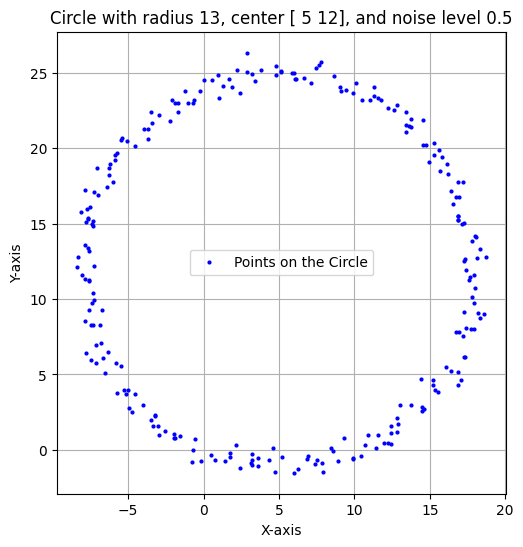

In [48]:
def Circle_e2738425(r = 13, C = np.array([5, 12]), N=250, n=0.0):
  '''
    takes radius r, center [x,y], number of data points N, noise level n
    and returns D which is 2xN
    columns on D are point on the circle centered at C with radius r
    if n is not 0 then to every point in D, add np.random.rand() x n amount of noise
    return D as a numpy array
  '''
  # I use Chat GPT for adding noise. My prompt is: Can you add noise n for generated point in this code. if n is not 0
  # then to every point in D, add np.random.rand() x n amount of noise. It generate right code with 1 prompt
  # Generate N angles uniformly between 0 and 2*pi
  angles = np.linspace(0, 2 * np.pi, N)

  # Calculate the points on the circle
  x_circle = C[0] + r * np.cos(angles)
  y_circle = C[1] + r * np.sin(angles)

  # Create the D matrix for storing the points
  D = np.vstack((x_circle, y_circle))

  # Add noise if n is not zero
  if n != 0:
      noise = np.random.randn(2, N) * n
      D += noise
  plt.figure(figsize=(6, 6))
  plt.plot(D[0, :], D[1, :], 'bo', markersize=2, label="Points on the Circle")
  plt.gca().set_aspect('equal', adjustable='box')
  plt.grid(True)
  plt.title(f"Circle with radius {r}, center {C}, and noise level {n}")
  plt.xlabel("X-axis")
  plt.ylabel("Y-axis")
  plt.legend()
  plt.show()
  return D
